In [127]:
import sys
sys.path.insert(0,'/workspaces/RAG_secure_code_generation/src')
sys.path.insert(0,'/workspaces/RAG_secure_code_generation')
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json

In [128]:
sns.color_palette("hls", 8)


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [129]:
summary_file = "../../experiments/task_detect_xss_simple_prompt/experiments_summary.csv"


In [130]:
df = pd.read_csv(summary_file)
df.head()

,Unnamed: 0,successes,failures,total,accuracy,accuracy_std,accuracy_var,precision,precision_std,precision_var,...,top_15_accuracy_var,top_15_precision,top_15_precision_std,top_15_precision_var,top_15_recall,top_15_recall_std,top_15_recall_var,top_15_f1,top_15_f1_std,top_15_f1_var
0,0,50,0,50,0.718765,0.148206,0.021965,0.928139,0.138496,0.019181,...,0.002311,0.923941,0.098112,0.009626,0.852387,0.111139,0.012352,0.876072,0.051881,0.002692
1,1,50,0,50,0.738455,0.134767,0.018162,0.917520,0.134003,0.017957,...,0.001109,0.918561,0.100400,0.010080,0.815788,0.126191,0.015924,0.850058,0.040719,0.001658
2,2,47,3,50,0.678764,0.165826,0.027498,0.961529,0.119094,0.014183,...,0.004680,0.999350,0.002054,0.000004,0.778447,0.135320,0.018312,0.868435,0.088921,0.007907
3,3,49,1,50,0.788162,0.159201,0.025345,0.956744,0.101042,0.010210,...,0.000318,0.997484,0.008984,0.000081,0.905528,0.035530,0.001262,0.948879,0.019180,0.000368
4,4,44,6,50,0.752529,0.164416,0.027033,0.937666,0.092455,0.008548,...,0.003578,0.943870,0.092799,0.008612,0.914042,0.088755,0.007877,0.922441,0.059281,0.003514


In [131]:
#set examples_per_class to 0 everytime generation_mode = zero_shot
df.loc[df['generation_mode'] == 'zero_shot', 'examples_per_class'] = 0

In [132]:
df = df[['model_name', 'temperature', 'examples_per_class', 'folder']]


In [133]:
def from_folder_to_accuracy_list(folder:str)->list:
    folder = os.path.join('../..', folder)
    #find all the subfolder in folder:
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]
    #map subfolder to the dict conteined in results.json file
    results = []
    for subfolder in subfolders:
        with open(os.path.join(subfolder, 'results.json')) as f:
            results.append(json.load(f))
    #keep only the results where failed is False
    results = [r for r in results if not r['failed']]
    #map results to accuracy
    results = [r['results']['accuracy'] for r in results]
    return results
    

In [134]:
df.head()

,model_name,temperature,examples_per_class,folder
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...
1,gpt-4-1106-preview,0.0,0,experiments/task_detect_xss_simple_prompt/temp...
2,gpt-4-1106-preview,1.0,0,experiments/task_detect_xss_simple_prompt/temp...
3,gpt-4-1106-preview,0.5,10,experiments/task_detect_xss_simple_prompt/temp...
4,gpt-4-1106-preview,0.0,10,experiments/task_detect_xss_simple_prompt/temp...


In [135]:
df['accuracy'] = df['folder'].map(from_folder_to_accuracy_list)

In [136]:
df.head()

,model_name,temperature,examples_per_class,folder,accuracy
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.7030241563710123, 0.7497695002765997, 0.844..."
1,gpt-4-1106-preview,0.0,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.49400700719159135, 0.8457495851004979, 0.64..."
2,gpt-4-1106-preview,1.0,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.5019361976765628, 0.928452885856537, 0.9205..."
3,gpt-4-1106-preview,0.5,10,experiments/task_detect_xss_simple_prompt/temp...,"[0.8780195463765443, 0.7567766918679698, 0.930..."
4,gpt-4-1106-preview,0.0,10,experiments/task_detect_xss_simple_prompt/temp...,"[0.5217591738889913, 0.512539184952978, 0.8579..."


In [137]:
#explode the accuracy list
df = df.explode('accuracy')
df.head()

,model_name,temperature,examples_per_class,folder,accuracy
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.703024
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.74977
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.84492
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.636825
0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.845934


In [138]:
#reinitialize the index
df = df.reset_index(drop=False)
df.head()

,index,model_name,temperature,examples_per_class,folder,accuracy
0,0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.703024
1,0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.74977
2,0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.84492
3,0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.636825
4,0,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.845934


In [139]:
df["model_temperature"] = df["model_name"] + "_" + df["temperature"].astype(str)



In [140]:
#drop gpt3.5 with temperature 0 columns
df = df[df['model_temperature'] != 'gpt-3.5-turbo-0613_0.0']


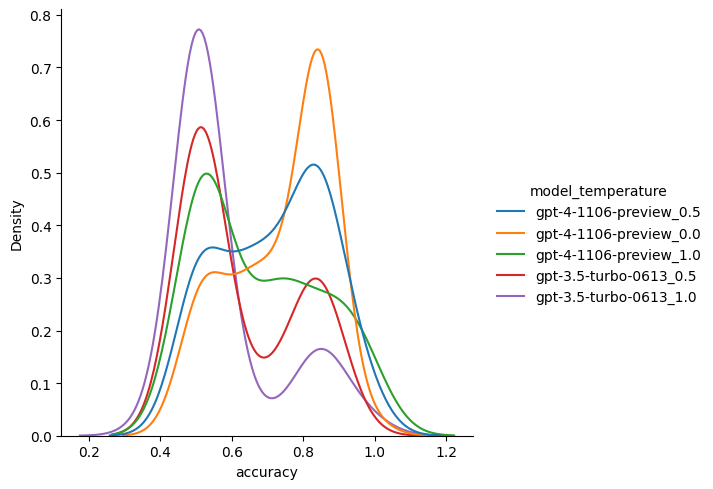

In [141]:
#pick only the rows with examples_per_class = 0
df_test = df[df['examples_per_class'] == 0]
#draw scatterplot
sns.displot(data=df_test, x="accuracy", hue="model_temperature", kind="kde")

<Figure size 2000x1000 with 0 Axes>

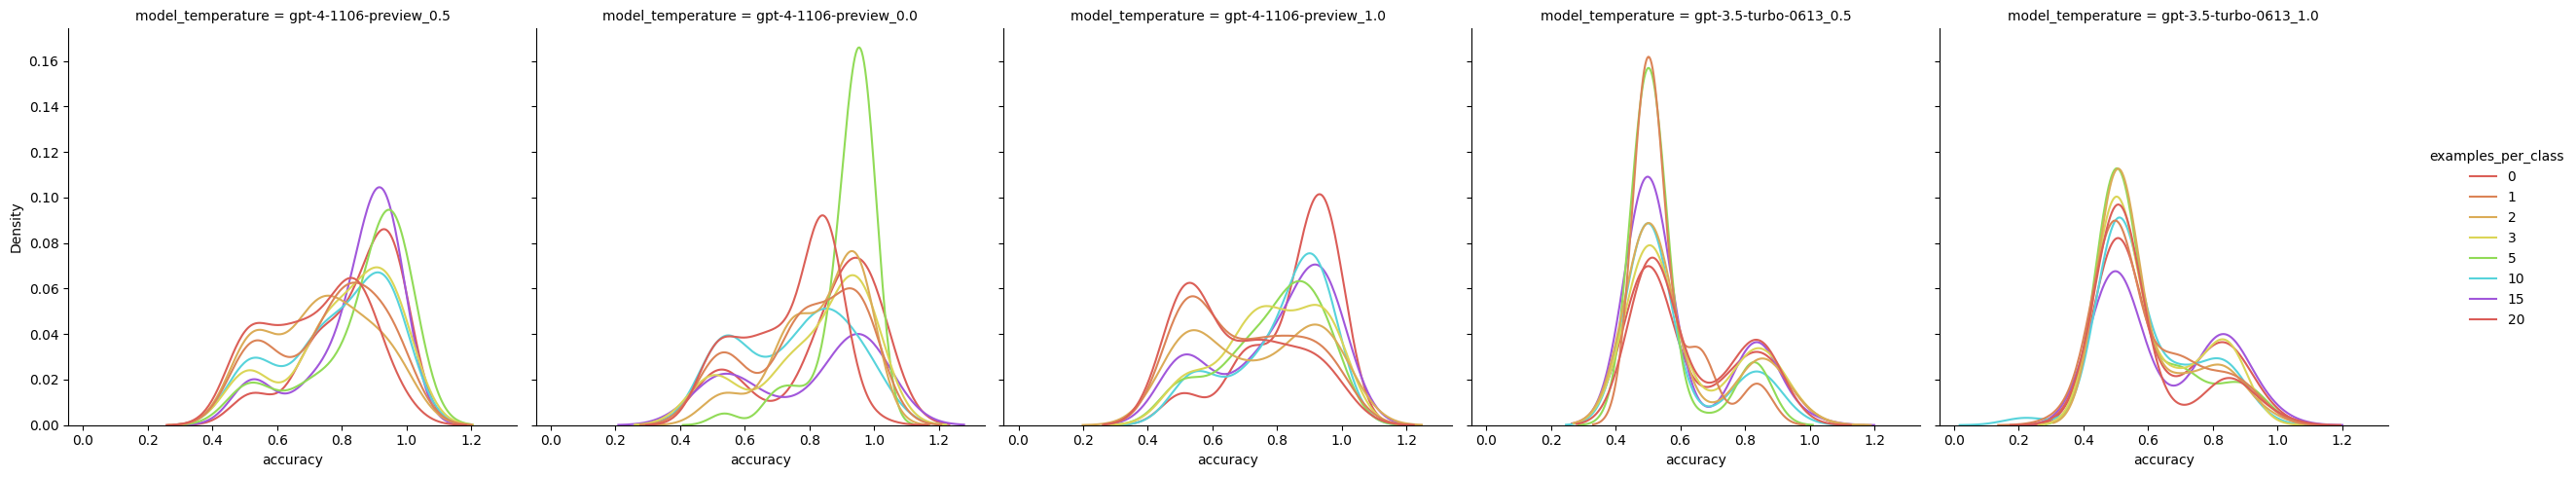

In [150]:
#draw displot
plt.figure(figsize=(20,10))
#ax = sns.displot(x='accuracy', hue='examples_per_class', data=df, row = "model_temperature", element = "step",kde=True, palette="hls")
ax = sns.displot(x='accuracy', hue='examples_per_class', data=df, col = "model_temperature", kind="kde", palette="hls")
#show x labels
#show values of accuracy on x axis

plt.show()

<Figure size 2000x1000 with 0 Axes>

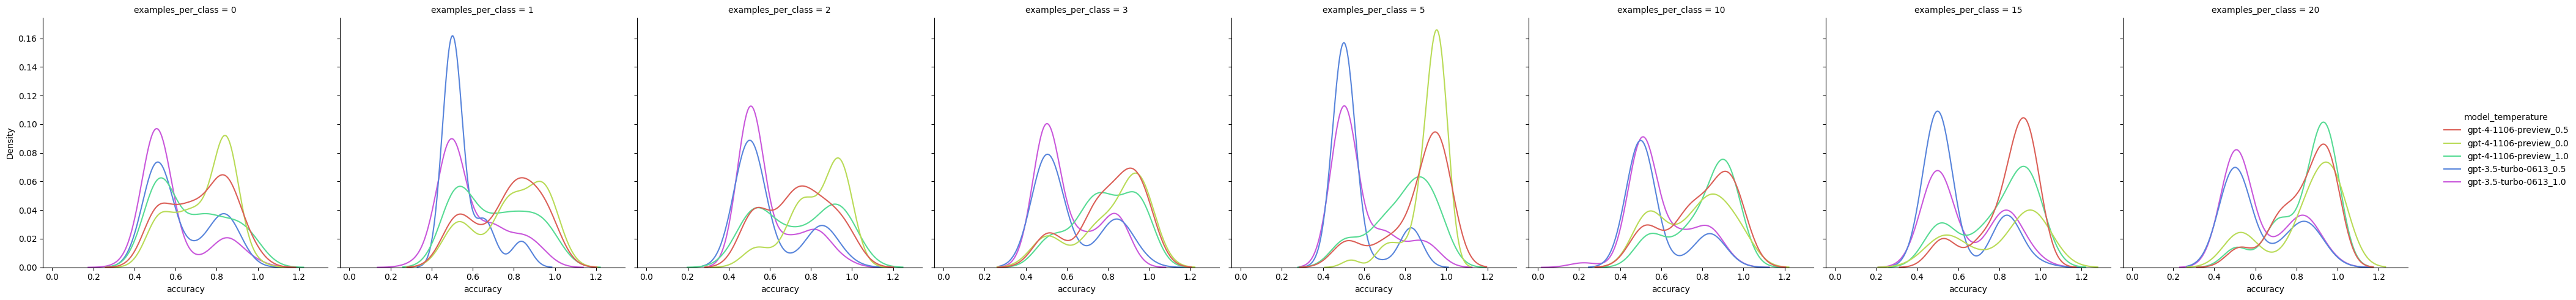

In [149]:
#draw displot
plt.figure(figsize=(20,10))
#ax = sns.displot(x='accuracy', hue='examples_per_class', data=df, row = "model_temperature", element = "step",kde=True, palette="hls")
ax = sns.displot(x='accuracy', hue='model_temperature', data=df, col = "examples_per_class", kind="kde", palette="hls")
#show x labels
#show values of accuracy on x axis

plt.show()